In [ ]:
#导入必须的库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')#画图风格
np.random.seed(100)
window=12#时间窗
label_dim=50#标签纬度
amount_of_features=1#特征数量
d=0.05#dropout系数
batch_size=12#批训练数量
epoch=50#总迭代次数
train_file='Data2.xlsx'#读取训练集地址
show_num=100#展示训练集最后多少个数据点

In [ ]:
#展示下读取的数据
data_origin=pd.read_excel(train_file,header=0) 
data_origin.head()

,Unnamed: 0,Unnamed: 1
0,5.311336,380.047791
1,5.672167,453.769196
2,5.216037,306.376587
3,5.659674,419.645905
4,5.577941,380.650696


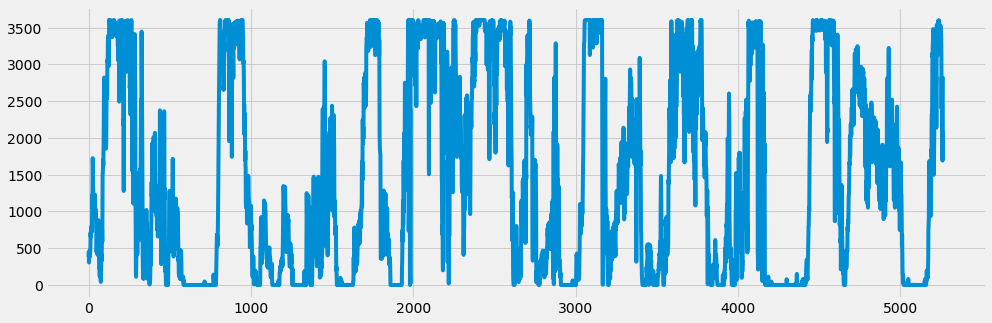

In [ ]:
#画图看看
plt.figure(figsize=(15, 5))
plt.plot(data_origin.iloc[:-200,1])
plt.show()

In [ ]:
#归一化
data=(data_origin-data_origin.min())/(data_origin.max()-data_origin.min())
#构造针对机器学习模型的数据集(特征和标签)
data=data.values
length=data.shape[0]
features_num=data.shape[1]
x=[]
y=[]
for i in range(length-window-label_dim):
    x.append(data[i:i+window,:])
    y.append(data[i+window:i+window+label_dim,-1])
x=np.array(x)
y=np.array(y)
print(x.shape,y.shape)

(5400, 12, 2) (5400, 50)


In [ ]:
#划分训练集和测试集
x_train,x_test,y_train,y_test=x[:-1,:],x[-2:-1,:],y[:-1,:],y[-2:-1,:]
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5399, 12, 2) (1, 12, 2) (5399, 50) (1, 50)


In [ ]:
#建立LSTM模型 训练
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Dropout
from keras.layers.recurrent import LSTM
#建立训练模型过程
model = Sequential()#建立层次模型
model.add(LSTM(label_dim, input_shape=(window, features_num), return_sequences=False))#建立LSTM层
#model.add(Dropout(d))
model.add(Dense(label_dim*2,activation='relu'))   #建立全连接层  
#model.add(Dropout(d))
model.add(Dense(label_dim,activation='relu'))
#编译模型
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50)                10600     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
Total params: 20,750
Trainable params: 20,750
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#神经网络训练及结果
history = model.fit(x_train, y_train, epochs =epoch, batch_size = batch_size,verbose=1,validation_split=0.1) #训练模型nb_epoch次

Epoch 1/50
405/405 [==============================] - 2s 4ms/step - loss: 0.1167 - accuracy: 0.0473 - val_loss: 0.0744 - val_accuracy: 0.0259
Epoch 2/50
405/405 [==============================] - 1s 4ms/step - loss: 0.0975 - accuracy: 0.0679 - val_loss: 0.0769 - val_accuracy: 0.0556
Epoch 3/50
405/405 [==============================] - 1s 4ms/step - loss: 0.0924 - accuracy: 0.0741 - val_loss: 0.0705 - val_accuracy: 0.0667
Epoch 4/50
405/405 [==============================] - 1s 4ms/step - loss: 0.0918 - accuracy: 0.0768 - val_loss: 0.0696 - val_accuracy: 0.0796
Epoch 5/50
405/405 [==============================] - 1s 4ms/step - loss: 0.0918 - accuracy: 0.0764 - val_loss: 0.0700 - val_accuracy: 0.1000
Epoch 6/50
405/405 [==============================] - 1s 4ms/step - loss: 0.0918 - accuracy: 0.0766 - val_loss: 0.0692 - val_accuracy: 0.0889
Epoch 7/50
405/405 [==============================] - 1s 4ms/step - loss: 0.0905 - accuracy: 0.0803 - val_loss: 0.0670 - val_accuracy: 0.0815
Epoch 

In [ ]:
y_test_pred=model.predict(x_test)[0,:]
pred=y_test_pred*(data_origin.max()[1]-data_origin.min()[1])+data_origin.min()[1]#反归一化

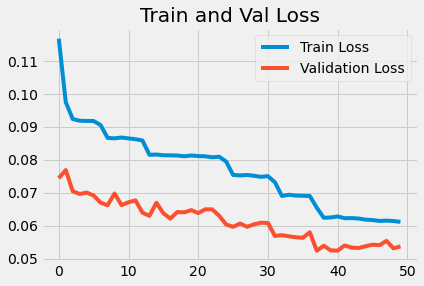

In [ ]:
#迭代图像
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epoch)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()

[107.44429  104.38014  118.23043  181.4299   159.57016  188.60944
 225.6696    -2.471405 250.18321  260.34772  272.54965  269.95984
 258.84213  254.58752  252.91124  274.75186  310.75827  327.002
 320.93982  366.4907   356.9891   388.58783  416.98044  424.5377
 455.31955  460.26227  455.40857  476.9145   520.9132   548.4884
 559.40234  576.6957   611.27344  624.64514  662.5112   642.78577
 672.67944  670.20435  690.1592   713.01807  720.74585  752.27515
 783.42017  805.1427   814.77234  808.322    853.7368   853.3502
 878.1565   913.3955  ]


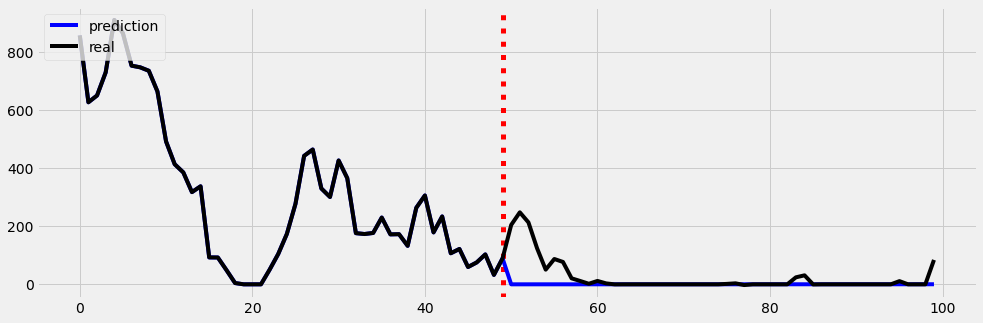

In [ ]:
#画图
print(pred)
data_origin=data_origin.values
train=data_origin[-show_num:-label_dim,-1]
test=data_origin[-label_dim:,-1]
pred=np.hstack((train,y_test_pred))
real=np.hstack((train,test)) 
plt.figure(figsize=(15, 5))
plt.axvline(len(train)-1, linestyle="dotted", linewidth=5, color='r')
plt.plot(pred,label="prediction", color="b")
plt.plot(real,label="real", color="k")
plt.legend(loc="upper left")
plt.show()